#Social Network Analysis

At the end of this ICE, I will be able to:

* visualize a social network
* conduct basic network analysis
* enhance the visualization of your network

Social network analysis is a method by which one can analyze the connections across individuals or groups or institutions. That is, it allows us to examine how entities are interrelated. In this ICE, we will look at a few important important steps of social network analysis.

##SNA Data Preparation
There are three ways to store SNA data: (a) node and edge list, (b) adjacency matrix, and (c) adjacency list (see the figure below).

Node and edge list is a most widely used way of storing SNA data. You will have a list of nodes and a list of edge pairs. Notice that you may not need the node list if you don't have "orphan" nodes -- meaning the nodes are not connected to any other nodes (the example in the figure below).

Adjacency matrix is also very commonly use. Instead of having two tables, you just need one big matrix.

Adjacency list is easy to interpret for human eyes but it is less used because it is "untidy".

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SNAdata = pd.read_csv("ICE8_Data.csv", index_col = 0)
G = nx.Graph(SNAdata)

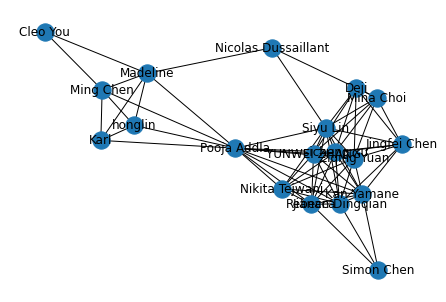

In [3]:
nx.draw(G, with_labels = True)

## Network Statistics
### Density

In [4]:
density = nx.density(G)
print('The edge density is:%.3f' % (density))

The edge density is:0.415


This value of 0.415 indicates that this network is quite well-connected because we can see more than 40% links among all possible links. This is going to be harder and harder as the network size gets bigger.

### Degree Centrality

In [5]:
degree = nx.degree(G)
degree

DegreeView({'Nicolas Dussaillant': 3, 'Ming Chen': 5, 'Rebecca': 9, 'Nikita Tejwani': 8, 'Simon Chen': 3, 'Pooja Addla': 12, 'honglin': 4, 'Karl': 4, 'sicheng xu': 11, 'Jianan Dingqian': 10, 'Siyu Lin': 12, 'Ziqing Yuan': 11, 'Jingfei Chen': 8, 'Mina Choi': 7, 'Cleo You': 2, 'Deji': 6, 'Kan Yamane': 10, 'YUNWEI ZHANG': 11, 'Madeline': 6})

In [6]:
pd.DataFrame(degree)

,0,1
0,Nicolas Dussaillant,3
1,Ming Chen,5
2,Rebecca,9
3,Nikita Tejwani,8
4,Simon Chen,3
5,Pooja Addla,12
6,honglin,4
7,Karl,4
8,sicheng xu,11
9,Jianan Dingqian,10


### Closeness centrality

In [7]:
close = nx.closeness_centrality(G)
pd.DataFrame.from_dict(close, orient = 'index')

,0
Nicolas Dussaillant,0.529412
Ming Chen,0.514286
Rebecca,0.642857
Nikita Tejwani,0.620690
Simon Chen,0.428571
Pooja Addla,0.750000
honglin,0.500000
Karl,0.500000
sicheng xu,0.692308
Jianan Dingqian,0.666667


### Betweenness centrality

In [8]:
between = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between, orient = 'index')

,0
Nicolas Dussaillant,0.028494
Ming Chen,0.043542
Rebecca,0.029879
Nikita Tejwani,0.000000
Simon Chen,0.000000
Pooja Addla,0.363663
honglin,0.000000
Karl,0.000000
sicheng xu,0.037340
Jianan Dingqian,0.042367


## Community detection
Then let's take a look at the network structure through community detection. This method is very similar to clustering algorithm, which we have seen a few weeks ago. In a social network this is the idea that a large network can be broken down into smaller communinities/cliques. For example, if the network represents the social relationships of all the students at a school, a community/clique would be a friendship group.

In [9]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(G))

print(len(c))

3


In [10]:
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)

['Deji', 'Jingfei Chen', 'Mina Choi', 'Nicolas Dussaillant', 'Siyu Lin', 'YUNWEI ZHANG', 'Ziqing Yuan', 'sicheng xu']
['Cleo You', 'Karl', 'Madeline', 'Ming Chen', 'Pooja Addla', 'honglin']
['Jianan Dingqian', 'Kan Yamane', 'Nikita Tejwani', 'Rebecca', 'Simon Chen']


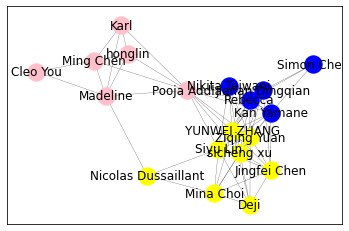

In [11]:
# Set seed (optional)
np.random.seed(123)

# Obtain the positions of the nodes
pos = nx.spring_layout(G)

# Print out all the nodes with color
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='yellow', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_1, node_color='pink', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_2, node_color='blue', label = True)

# Print out the edges
nx.draw_networkx_edges(G, pos = pos, width = 0.2)

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

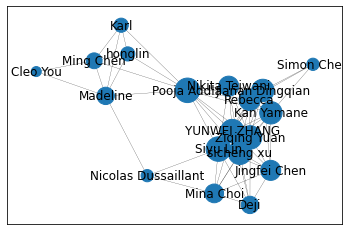

In [12]:
nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G, pos = pos, width = 0.2)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

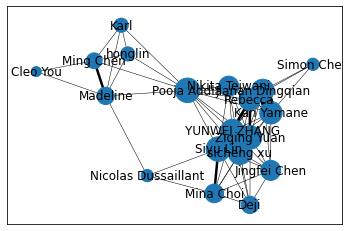

In [13]:
eWeight = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])
nx.draw_networkx_labels(G, pos=pos)

plt.show()

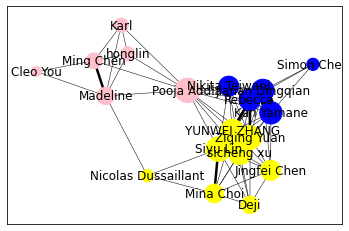

In [14]:
# Degrees of each community
community_0_degree = {c: dict(degree)[c] for c in community_0}
community_1_degree = {c: dict(degree)[c] for c in community_1}
community_2_degree = {c: dict(degree)[c] for c in community_2}

# Print out the nodes with color and size
nx.draw_networkx_nodes(G, pos = pos, 
                       nodelist=community_0,
                       node_color='yellow',
                       node_size = [v * 50 for v in community_0_degree.values()],
                       label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_1,
                       node_size = [v * 50 for v in community_1_degree.values()],
                       node_color='pink', label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_2,
                       node_size = [v * 50 for v in community_2_degree.values()],
                       node_color='blue', label = True)

# Print out the edges with proper width
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()